# Magnetic field of a charged wire
- Börge Göbel

![hand](figure_05_hand.svg)

https://upload.wikimedia.org/wikipedia/commons/3/3e/Manoderecha.svg

Using the Maxwell equations of magnetostatics (in their integral form) one can derive the vector potential of a current density distribution $ \vec{j}(\vec{r}) $

$ 
\vec{A}(\vec{r})=\frac{\mu_0}{4\pi}\int\frac{\vec{j}(\vec{r}')}{|\vec{r}-\vec{r}'|}\,\mathrm{d}V'\\
$

from which we can calculate the magnetic field 

$ 
\vec{B}(\vec{r})=\nabla\times\vec{A}(\vec{r})\\
$

For more details on these equations, please consider my course: "Electrodynamics based on Maxwell equations" https://www.udemy.com/course/electrodynamics/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Straight wire

- along z axis
- very long: length $ [-l_0,l_0]$ (we will only consider the xy plane, because all other planes will behave equally)
- very thin: radius $r_0$ (basically non-zero only for x = 0, y = 0)

In [4]:
mu0 = 1

# straight wire
j0 = 1 # Ampere / meter^2
r0 = 0.001 # m
l0 = 1000 # m

def j(r):
    # if np.sqrt(r[0]**2 + r[1**2]) > r0:
    #     return np.array([0.0, 0.0, 0.0])
    # else:
        return np.array([0.0, 0.0, j0])

In [5]:
j(np.array([0,0,5]))

array([0., 0., 1.])

In [16]:
coordMax = 4.9
numpoints = 50
d = 2*coordMax / (numpoints-1)

# coordinates: standard indexing is yxz, fix by using "indexing = 'ij'"
coords = np.array(np.meshgrid(
    np.linspace(-coordMax, coordMax, numpoints),
    np.linspace(-coordMax, coordMax, numpoints),
    np.zeros(1),
    indexing = 'ij'))

In [17]:
print(coords[:,numpoints//2-1,numpoints//2,0])
print(coords[:,numpoints//2,numpoints//2,0])

[-0.1  0.1  0. ]
[0.1 0.1 0. ]


In [18]:
# vector potential

A = np.array(np.meshgrid(
    np.zeros(numpoints),
    np.zeros(numpoints),
    np.zeros(1),
    indexing = 'ij'))


In [19]:
print(A[:,numpoints//2-1,numpoints//2,0])
print(A[:,numpoints//2,numpoints//2,0])

[0. 0. 0.]
[0. 0. 0.]


In [21]:
numint = 5001

for ix in np.arange(numpoints):
    for iy in np.arange(numpoints):
        #position r for which we are currently calculating A
        r = np.array([-coordMax+ix*d, -coordMax+iy*d, 0.0])
        for zj in np.linspace(-l0,l0, numint):
            # we integrate over all r' in the wire
            rj = np.array([0.0, 0.0, zj])
            A[:,ix,iy,0] += j(rj) / np.sqrt(r[0]**2 + r[1]**2 + rj[2]**2) 

In [22]:
dz = (2*l0) / (numint-1)
# dx = (2*coordMax) / (numpoints-1)
# dy = (2*coordMax) / (numpoints-1)
# A = A * mu0 / (4*np.pi) * dx * dy * dz

df = np.pi * r0**2
A = A * mu0 / (4*np.pi) * df * dz

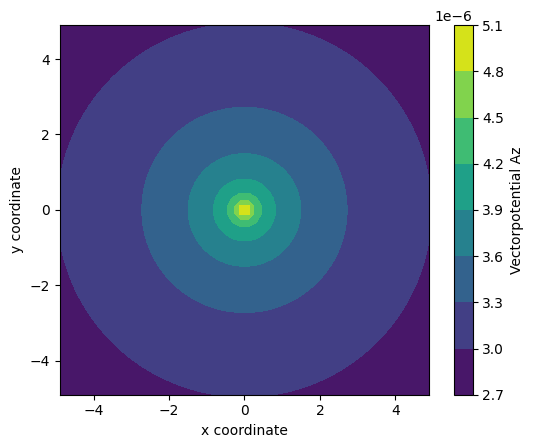

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")

plt.contourf(coords[0,:,:,0], coords[1,:,:,0], A[2,:,:,0])
cbar = plt.colorbar()
cbar.set_label("Vectorpotential Az")

__Analytical solution:__

$ \vec{A}(\vec{r}) = \frac{\mu_0}{2\pi}jF\log\frac{2l_0}{\sqrt{x^2+y^2}}\vec{e}_z$

For more details on these equations, please consider my course: "Electrodynamics based on Maxwell equations" https://www.udemy.com/course/electrodynamics/

![derivation_wire](figure_05_derivation_wire.png)

__We can calculate the magnetic field__

$ 
\vec{B}(\vec{r})=\nabla\times\vec{A}(\vec{r})=\begin{pmatrix}
\frac{\partial}{\partial y}A_z(\vec{r}) - \frac{\partial}{\partial z}A_y(\vec{r})\\
\frac{\partial}{\partial z}A_x(\vec{r}) - \frac{\partial}{\partial x}A_z(\vec{r})\\
\frac{\partial}{\partial x}A_y(\vec{r}) - \frac{\partial}{\partial y}A_x(\vec{r})\\
\end{pmatrix}=
\begin{pmatrix}
\frac{\partial}{\partial y}A_z(\vec{r})\\
-\frac{\partial}{\partial x}A_z(\vec{r})\\
\frac{\partial}{\partial x}A_y(\vec{r}) - \frac{\partial}{\partial y}A_x(\vec{r})\\
\end{pmatrix}\\
$

Since the vector potential only changes in the xy plane and is considered to be constant along z (for infinite $l_0$), we know
$ 
\frac{\partial }{\partial z} A_x(\vec{r}) = \frac{\partial }{\partial z} A_y(\vec{r}) = 0
$

In [26]:
# create empty array for magnetic field

B = np.array(np.meshgrid(
    np.zeros(numpoints),
    np.zeros(numpoints),
    np.zeros(1),
    indexing = 'ij'))

In [31]:
B[0,1:-1,1:-1,0] = (A[2,1:-1,2:,0] - A[2,1:-1,:-2,0]) / (2*d)
B[1,1:-1,1:-1,0] = -(A[2,2:,1:-1,0] - A[2,:-2,1:-1,0]) / (2*d)
B[2,1:-1,1:-1,0] = (A[1,2:,1:-1,0] - A[1,:-2,1:-1,0]) / (2*d) - (A[0,1:-1,2:,0] - A[0,1:-1,:-2,0]) / (2*d)

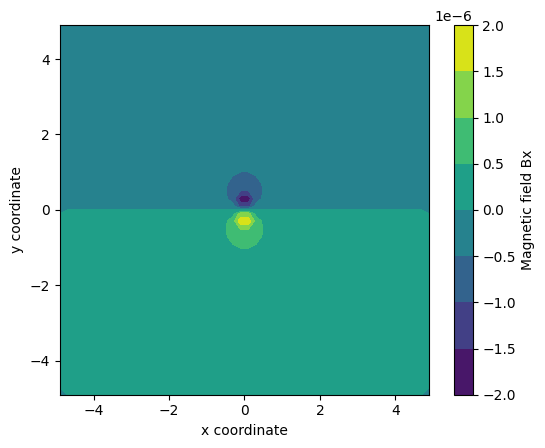

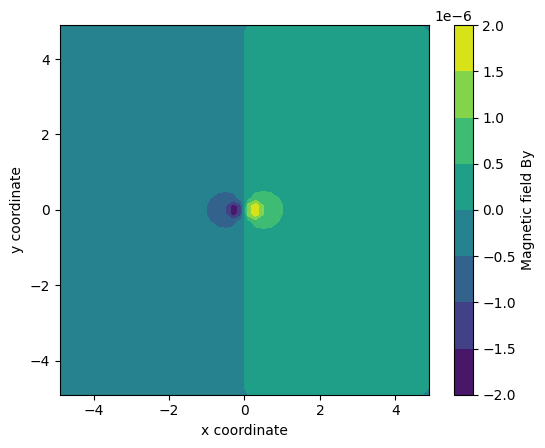

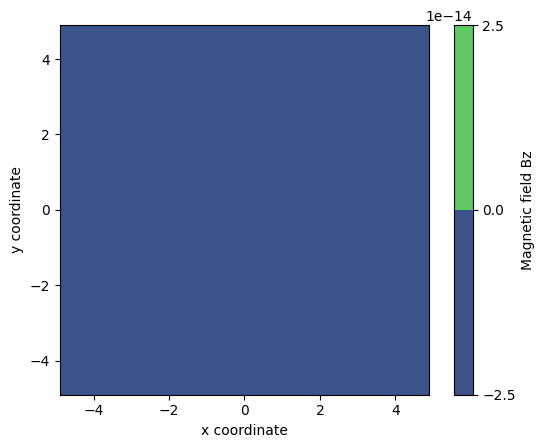

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.contourf(coords[0,:,:,0], coords[1,:,:,0], B[0,:,:,0])
cbar = plt.colorbar()
cbar.set_label("Magnetic field Bx")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.contourf(coords[0,:,:,0], coords[1,:,:,0], B[1,:,:,0])
cbar = plt.colorbar()
cbar.set_label("Magnetic field By")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.contourf(coords[0,:,:,0], coords[1,:,:,0], B[2,:,:,0])
cbar = plt.colorbar()
cbar.set_label("Magnetic field Bz")
plt.show()



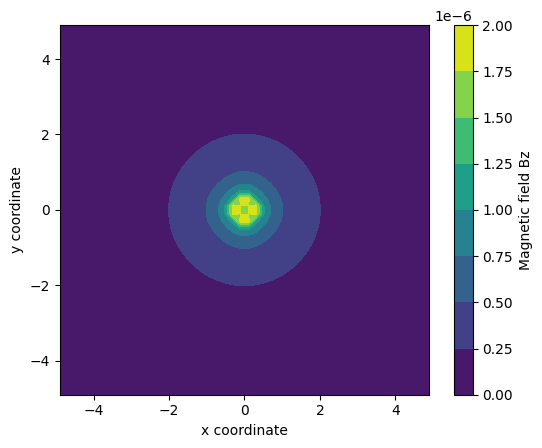

In [33]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.contourf(coords[0,:,:,0], coords[1,:,:,0], np.sqrt(B[2,:,:,0]**2 + B[1,:,:,0]**2 + B[0,:,:,0]**2))
cbar = plt.colorbar()
cbar.set_label("Magnetic field Bz")
plt.show()


__Analytical solution:__

$ \vec{B}(\vec{r}) = \frac{\mu_0}{2\pi}jF\frac{1}{\sqrt{x^2+y^2}}\begin{pmatrix}-y\\x\\0\end{pmatrix}$

![hand](figure_05_hand.svg)

https://upload.wikimedia.org/wikipedia/commons/3/3e/Manoderecha.svg

In [40]:
#Change standard size of all figures in this notebook
plt.rcParams["figure.figsize"] = [40,15]

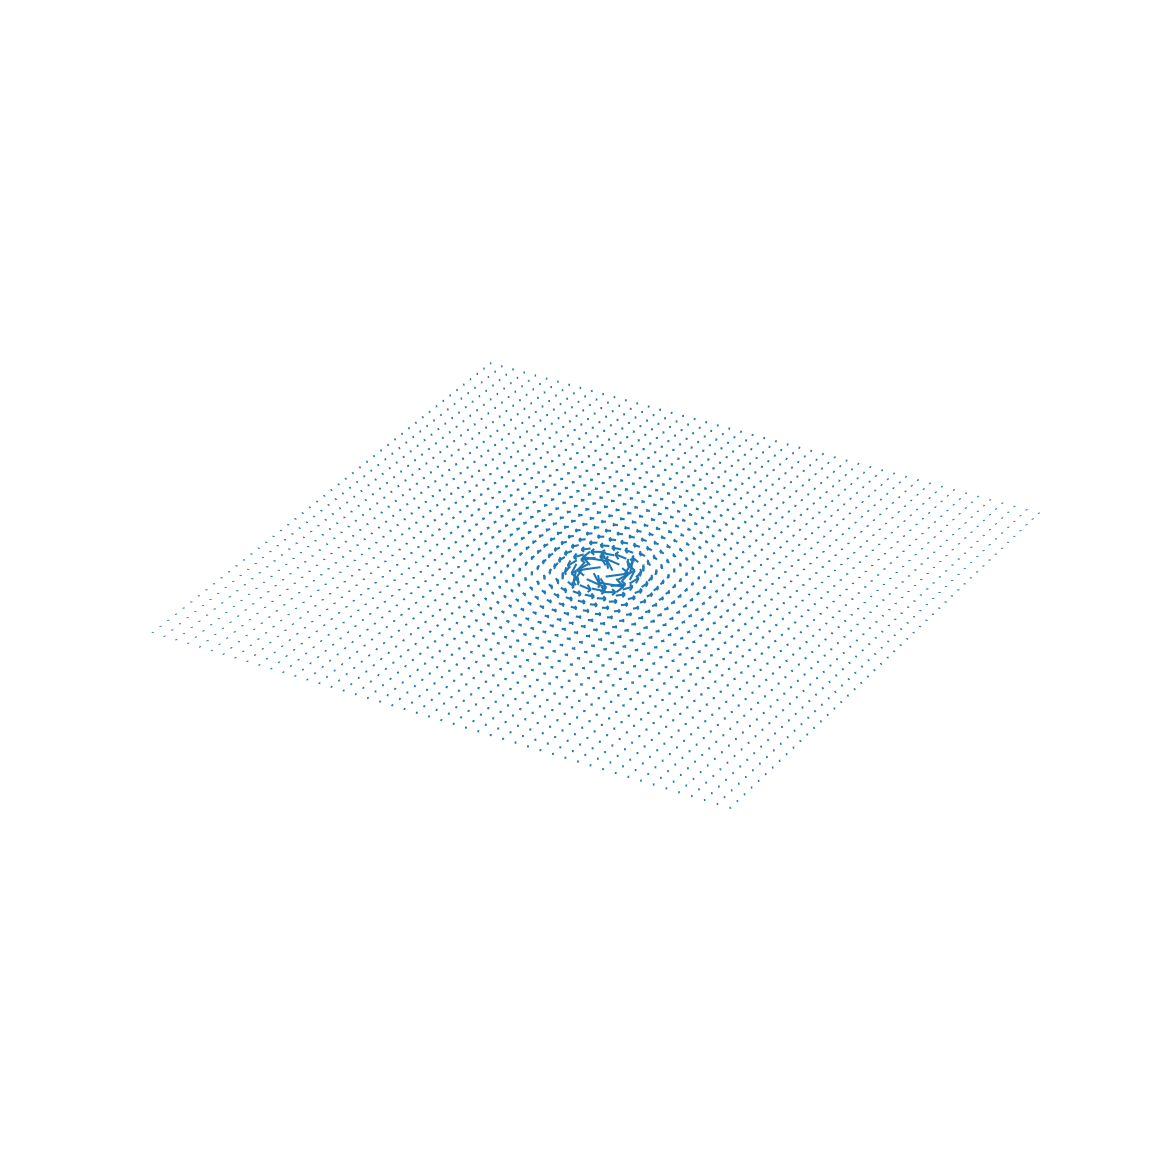

In [42]:
arrowplot = plt.axes(projection = "3d")
arrowplot.set_zlim([-1,1])

#background invisible
arrowplot.axis(False)

scale=0.2e6
arrowplot.quiver(
    coords[0], coords[1], coords[2],
    B[0]*scale, B[1]*scale, B[2]*scale,
)